In [1]:
# read the network
filepath = '30k.graph'
vertices = [];
edges = [];
readVertices = 0;
readEdges = 0;
with open(filepath) as fp:  
    line = fp.readline()
    cnt = 1
    while line:
        #print("Line {}: {}".format(cnt, line.strip()))
        
        if readVertices == 1:
            vertexData = line.strip().split(';');
            if len(vertexData)==4:
                idxGroup = int(vertexData[3]);
                vertices.append([int(vertexData[0]),idxGroup])
                
        if readEdges == 1:
            edgeData = line.strip().split(';');
            if len(edgeData)==2:
                edges.append([int(edgeData[0]),int(edgeData[1])])
                vertices[int(edgeData[0])].append(int(edgeData[1]));

        
        if line.strip() == '# Vertices':
            print('read vertices')
            readVertices = 1;
        if line.strip() == '# Edges':
            readVertices = 0;
            readEdges = 1;
            print('read edge')
        line = fp.readline()
        cnt += 1
        line.strip() 
#array con 1 elemento: numero vertice, 2 elemento: grupo que se encuentra
# resto son los vertices con los que se comunica
#print(edges)

read vertices
read edge


Tamaño poblacion
30000
cantidad de pares de comunicacion


Porcentaje grupos con distinta media de crimen
[0.07263333 0.10706667 0.1207     0.08643333 0.0677     0.08786667
 0.136      0.09116667 0.12053333 0.1099    ]
Vector media de crimen por grupos
[0.1 0.2 0.3 0.4 0.5 0.6 0.  0.7 0.8 0.9]
velocidad de olvido
0.9
impacto de la inseguridad nu
0.9
Resistencia a la inseguridad mu
0.1
Homofilia
0.10403632478632478
PoS media por grupos


/usr/local/lib/python2.7/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
/home/cristian/.local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(-25,0,u'Secure')

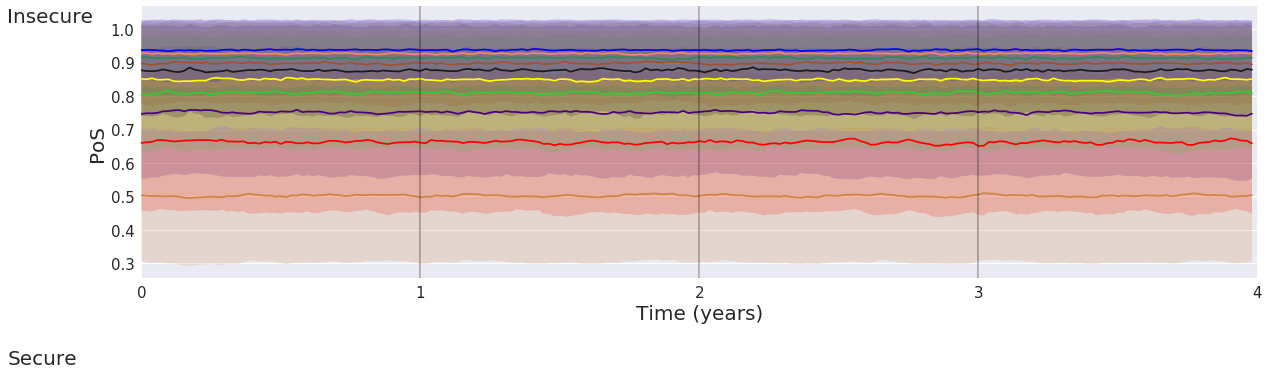

In [2]:
#Simulacion Pos
import numpy as np
import random
import matplotlib.pyplot as plt
n=len(vertices)
#vector identificacion de grupo
g=np.zeros(n)
for i in range(n):
    g[i]=vertices[i][1]
# cantidad de grupos
m=int(max(g)+1)
#porcentaje de cada grupo
q=np.zeros(m)
for i in range(m):
    q[i]=sum((g==i)*1.0)/n
#periodos en semanas
T=312 #6 años
s = np.random.rand(n)  # vector PoS de las personas en el intante t, al principio aleatorio
psi = 0.9  # velocidad perdida de memoria
nu = 0.9  # Impacto de la inseguridad
mu = 0.1  # Resistencia a la inseguridad
St = np.zeros((T,n ))  # PoS a lo largo del tiempo
lamda=np.array([0.1,0.2,0.3,0.4,0.5,0.6,0,0.7,0.8,0.9])
#lamda = np.random.rand(m)  # tasas de crimen de los grupos
#lamda[np.argmax(q)]=0 # para la mayor parte es el grupo inmune
#lamda=[0.05,0,0.5]
#identificacion de cada sujeto con su respectiva media de crimen
for i in range(n):
    for j in range(m):
        if g[i]==j:
            g[i]=lamda[j]
homofilia=np.zeros(T)
St[0] = s
parescom=np.zeros(T)#cantidad pares de comunicacion en cada periodo
commismogrupo=np.zeros(T)#cantidad de comunicaciones en el mismo grupo
for t in range(1,T):
        # Al inicio de cada periodo aplicamos la perdida de memoria
        s = psi * s
        
        #escogemos las parejas de comunicacion 
        paleatorio=np.random.permutation(np.arange(n))#personas grupo 1 en orden aleatorio
        persona1=paleatorio[:int(n*0.1)] #primer 10%
        persona2=paleatorio[-int(n*0.1):]#ultimo 10%


        for k in range(len(persona1)):
            #para grupo 1
            aux1=persona1[k]
            aux2=persona2[k]
            
            if s[aux1]<s[aux2]:
                s[aux1] = s[aux1] - nu * (s[aux1] - s[aux2])
                s[aux2] = s[aux2] - mu * (s[aux2] - s[aux1])
            else:
                s[aux1] = s[aux1] - mu * (s[aux1] - s[aux2])
                s[aux2] = s[aux2] - nu * (s[aux2] - s[aux1])

            if g[aux1]==g[aux2]:
                commismogrupo[t]=commismogrupo[t]+1
        
        parescom[t]=len(persona1)
        homofilia[t]=commismogrupo[t]/parescom[t]
    

        for k in range(n):
            # numero de crimenes sufridos por la persona k 
            X = np.random.poisson(g[k])
            # posicion hubo crimen o no
            I = 0
            if X >= 1:  # si hubo al menos un crimen I=1 de lo contrario I=0
                I = 1
            # efecto del crimen en la percepcion de k para el siguiente periodo
            s[k] = I + (1 - I) * s[k] 
        St[t] = s
print("Tamaño poblacion")
print(n)
print("cantidad de pares de comunicacion")
plt.plot(parescom[1:])
plt.show()
print("Porcentaje grupos con distinta media de crimen")
print(q)
print("Vector media de crimen por grupos")
print(lamda)
print("velocidad de olvido")
print(psi)
print("impacto de la inseguridad nu")
print(nu)
print("Resistencia a la inseguridad mu")
print(mu)
print("Homofilia")
print(np.mean(homofilia))

%matplotlib inline 
plt.figure(figsize=(20,5))
#print("Grafica PoS individual")
#plt.plot(St[104:],alpha=0.1)
#plt.plot(np.mean(St[104:],axis=1),'blue',linewidth=8)
#plt.show()
import seaborn as sns
sns.set(color_codes=True)
plt.figure(figsize=(20,5))
print("PoS media por grupos")
colores=["Red","indigo","limegreen","yellow","k","sienna","peru","seagreen","salmon","blue"]
G=[]
for i in range(m):
    grupo=np.zeros((T,int(n*q[i])))
    contador=0
    for k in range(n):
        if g[k]==lamda[i]:
            grupo[:,contador]=St[:,k]
            contador=contador+1
    #plt.plot(grupo,alpha=0.1)
    sns.tsplot(data=grupo[104:].T,ci='sd',color=colores[i])
    G.append(grupo[104:].T)
#plt.legend(["susceptible", "immune", "highly susceptible"],ncol=3,fontsize=20,bbox_to_anchor=(0, -0.3), loc=2, borderaxespad=0)
plt.axvline(52, color = 'black',alpha=0.3)
plt.axvline(104, color = 'black',alpha=0.3)
plt.axvline(156, color = 'black',alpha=0.3)
plt.xlabel("Time (years)",fontsize=20)
plt.ylabel("PoS",fontsize=20)
ax = plt.axes()
ax.xaxis.set_ticks([0, 52, 104, 156, 208])
ax.xaxis.set_ticklabels(['0', '1', '2', '3', '4'])
ax.tick_params(labelsize=15)
plt.text(-25, 1.02,'Insecure', fontsize=20)
plt.text(-25, 0,'Secure', fontsize=20)

                

In [3]:
tiempo=G[0].shape[1]
g=[]
for k in range(m):
    mean=np.zeros(tiempo)
    std=np.zeros(tiempo)
    for i in range(tiempo):
        mean[i]=np.mean(G[k][i][:])
        std[i]=np.std(G[k][i][:])
    g.append((G[k],mean,std))

D=np.zeros((m,m))
for k in range(m):
    for n in range(m):
        if k == n:
            continue
        d=np.zeros(tiempo)
        for i in range(tiempo):
            if g[k][1][i] < g[n][1][i]:
                d[i]=g[n][1][i]-g[n][2][i]-g[k][1][i]-g[k][2][i]
            else:
                d[i]=g[k][1][i]-g[k][2][i]-g[n][1][i]-g[n][2][i]
        D[k][n]=np.mean(d)
from pandas import DataFrame
D = DataFrame(D)
D

,0,1,2,3,4,5,6,7,8,9
0,0.000000,-0.311530,-0.224082,-0.168893,-0.123487,-0.089535,-0.240033,-0.063158,-0.039420,-0.019516
1,-0.311530,0.000000,-0.291622,-0.236838,-0.191535,-0.157582,-0.139378,-0.131205,-0.107468,-0.087564
2,-0.224082,-0.291622,0.000000,-0.273702,-0.230808,-0.197299,-0.050857,-0.170921,-0.147184,-0.127280
3,-0.168893,-0.236838,-0.273702,0.000000,-0.248511,-0.216701,0.004333,-0.190693,-0.166956,-0.147052
4,-0.123487,-0.191535,-0.230808,-0.248511,0.000000,-0.226460,0.049738,-0.202774,-0.179422,-0.159518
5,-0.089535,-0.157582,-0.197299,-0.216701,-0.226460,0.000000,0.083691,-0.208068,-0.187044,-0.167320
6,-0.240033,-0.139378,-0.050857,0.004333,0.049738,0.083691,0.000000,0.110068,0.133805,0.153709
7,-0.063158,-0.131205,-0.170921,-0.190693,-0.202774,-0.208068,0.110068,0.000000,-0.189087,-0.171971
8,-0.039420,-0.107468,-0.147184,-0.166956,-0.179422,-0.187044,0.133805,-0.189087,0.000000,-0.172975
9,-0.019516,-0.087564,-0.127280,-0.147052,-0.159518,-0.167320,0.153709,-0.171971,-0.172975,0.000000


In [4]:
for i in range(m):
    print(np.mean(g[i][1]))

0.6618954622081402
0.7462465241174443
0.8103655690428601
0.847846398110245
0.8767819040624315
0.8976876510815183
0.5026168906861277
0.913289601442089
0.9269118059635596
0.9378409885917848
